In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import os
import sys
import torch
import torch.nn as nn
import torch.nn.functional as F
sys.path.append('./data/')
sys.path.append('./models/')

In [2]:
from baseline import *
import pickle
with open('./data/dict_data_final.pkl', 'rb') as f:
    data = pickle.load(f)

# Datos reales $(x,y)$

In [3]:
x, y = data['Beneixama']

# Parámetros

In [4]:
list_P = [
    [0, 0.1, 0.5, 0.9, 1.01],
    [0, 0.1, 0.3, 0.5, 0.7, 0.9, 1.01],
    [0, 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1.01],
]
list_C = [1, 1.5, 2, 2.5, 3]

# Funciones

# Resultados

In [5]:
P = list_P[1]
C = list_C[2]

In [6]:
grid = Grid(x=x, y=y)
grid.initialize(part=P, div=C)
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=100)

In [7]:
grid_g = Grid(x=x, y=y, mode='gumbel')
grid_g.initialize(part=P, div=C)
grid_g.submatrix()
grid_g.enlargement_process()
grid_g.montecarlo(n_it=100)

In [8]:
sus_X = [(grid.X[:, :, i] == 0).sum().item() for i in range(grid.X.shape[2])]
sus_y = [(grid.y[:, :, i] == 0).sum().item() for i in range(grid.y.shape[2])]
abs_X = range(len(sus_X))
abs_y = np.argwhere(x.Train.values == True).flatten()

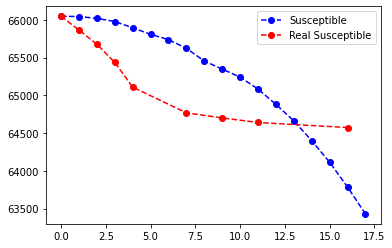

In [9]:
#plt.plot(grid.df_MC['Susceptible'], label='Exp. Susceptible')
plt.plot(abs_X, sus_X, 'b--o', label='Susceptible')
plt.plot(abs_y, sus_y, 'r--o', label='Real Susceptible')
plt.legend()
plt.show()

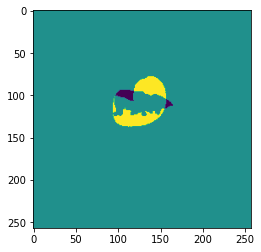

In [10]:
from sklearn.metrics import confusion_matrix

X = (grid.X[:, :, -1].numpy() != 0)*1
Y = (y[:, :, -1] != 0)*1

plt.imshow(X-Y)

<AxesSubplot:>

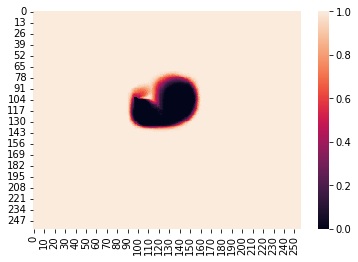

In [11]:
sns.heatmap(grid.X0[:, :, -1])

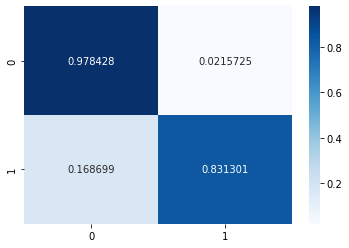

In [12]:
from sklearn.metrics import confusion_matrix

# compute the confusion matrix of X e Y

cmat = confusion_matrix(Y.flatten(), X.flatten(), normalize='true')
total = np.sum(cmat)
sns.heatmap(cmat, annot=True, cmap='Blues', fmt='g')
plt.show()

In [13]:
(cmat[0,0] + cmat[1,1])/(cmat.sum())

0.9048641645763243

In [14]:
grid = Grid(x=x, y=y)
grid.initialize(part=P, div=C)
grid.submatrix()
grid.enlargement_process()
grid.montecarlo(n_it=1000)

In [15]:
grid_g = Grid(x=x, y=y, mode='gumbel')
grid_g.initialize(part=P, div=C)
grid_g.submatrix()
grid_g.enlargement_process()
grid_g.montecarlo(n_it=1000)

In [16]:
df_resta = abs(grid_g.df_MC - grid.df_MC)

<AxesSubplot:>

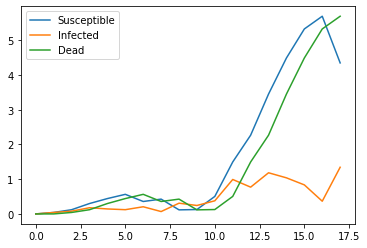

In [17]:
df_resta.plot()